# Imports

In [ ]:
import os
import io
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import requests

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

pathname = "/content/drive/My Drive/STAT 223/"
os.chdir(pathname)

Mounted at /content/drive/


In [ ]:
data = pd.read_csv("/content/drive/My Drive/STAT 223/county_votes.csv")

In [ ]:
data.head()

,county_name,state,unemployment,county_type,phd,avg_salary,dem_vote_margin
0,Ashbridge,Alabama,5.367391,rural,0.739640,52.258332,11.365831
1,Briarwood,Alaska,7.966793,rural,0.621378,57.087435,-29.128347
2,Silverpine,Arizona,6.552834,rural,9.237813,64.702060,5.548682
3,Maple Hollow,Arkansas,9.890120,urban,2.944910,61.954513,-25.026690
4,Stonefield,California,6.775271,suburban,1.539731,42.774509,10.883257


# dem_vote_margin

We will be considering how the two-way margin (dem vote margin) is affected by unemployment, county type, phd and avg salary. Look at the histograms, the scatterplot of dem vote margin vs. the explanatory variables, etc. to see if a transformation or non-linear term is appropriate here. What would you recommend in each case?

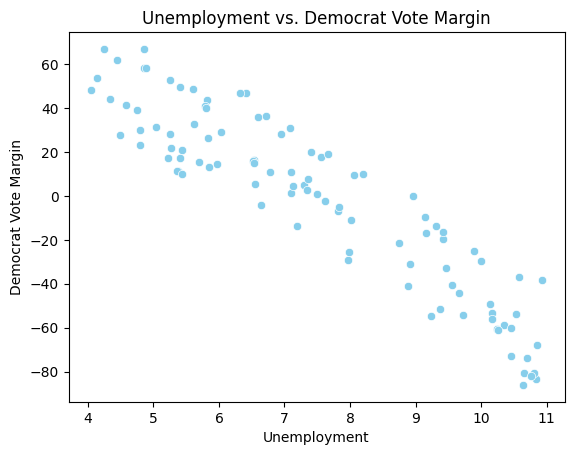

In [ ]:
# Unemployment vs. Democrat Vote Margin
sns.scatterplot(x='unemployment', y='dem_vote_margin', data=data, color='skyblue')
plt.xlabel('Unemployment')
plt.ylabel('Democrat Vote Margin')
plt.title('Unemployment vs. Democrat Vote Margin')
plt.show()

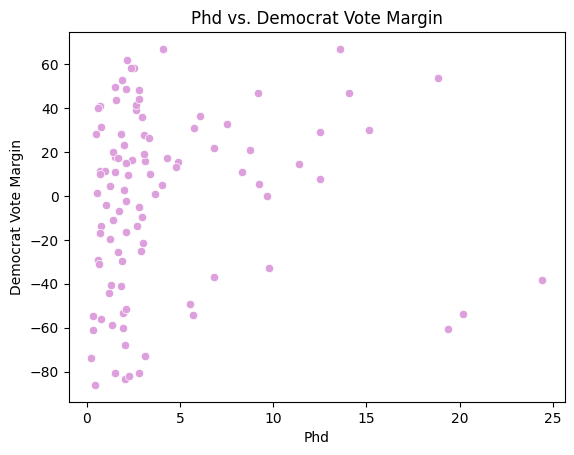

In [ ]:
#Phd vs. Democrat Vote Margi
sns.scatterplot(x='phd', y='dem_vote_margin', data=data, color='plum')
plt.xlabel('Phd')
plt.ylabel('Democrat Vote Margin')
plt.title('Phd vs. Democrat Vote Margin')
plt.show()

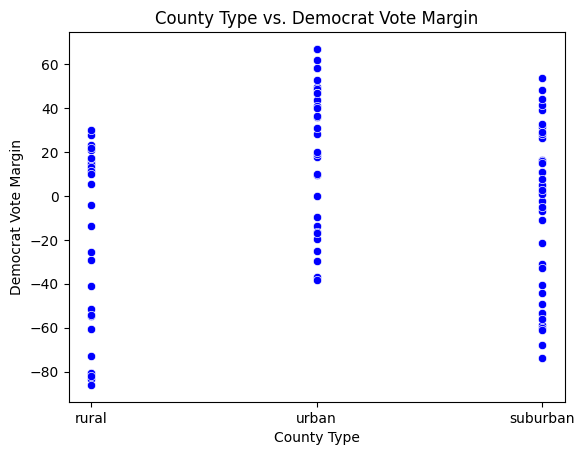

In [ ]:
# County Type vs. Democrat Vote Margin
sns.scatterplot(x='county_type', y='dem_vote_margin', data=data, color='blue')
plt.xlabel('County Type')
plt.ylabel('Democrat Vote Margin')
plt.title('County Type vs. Democrat Vote Margin')
plt.show()

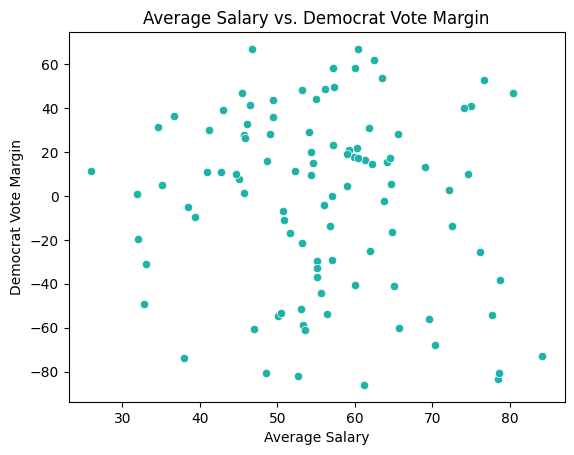

In [ ]:
# County Type vs. Democrat Vote Margin
sns.scatterplot(x='avg_salary', y='dem_vote_margin', data=data, color = 'lightseagreen')
plt.xlabel('Average Salary')
plt.ylabel('Democrat Vote Margin')
plt.title('Average Salary vs. Democrat Vote Margin')
plt.show()

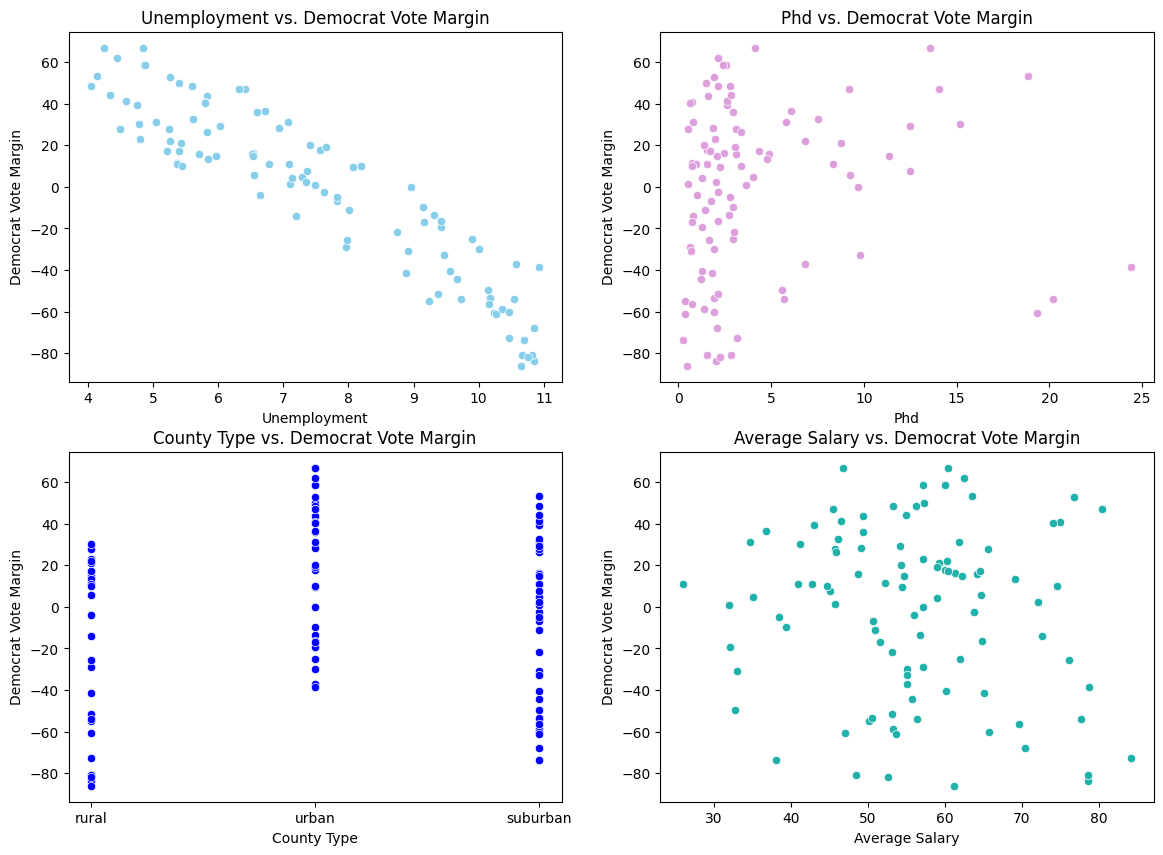

In [ ]:
# all together
plt.figure(figsize=(14, 10))
plt.tight_layout()

plt.subplot(2, 2, 1)
sns.scatterplot(x='unemployment', y='dem_vote_margin', data=data, color='skyblue')
plt.xlabel('Unemployment')
plt.ylabel('Democrat Vote Margin')
plt.title('Unemployment vs. Democrat Vote Margin')

plt.subplot(2, 2, 2)
sns.scatterplot(x='phd', y='dem_vote_margin', data=data, color='plum')
plt.xlabel('Phd')
plt.ylabel('Democrat Vote Margin')
plt.title('Phd vs. Democrat Vote Margin')

plt.subplot(2, 2, 3)
sns.scatterplot(x='county_type', y='dem_vote_margin', data=data, color='blue')
plt.xlabel('County Type')
plt.ylabel('Democrat Vote Margin')
plt.title('County Type vs. Democrat Vote Margin')

plt.subplot(2, 2, 4)
sns.scatterplot(x='avg_salary', y='dem_vote_margin', data=data, color = 'lightseagreen')
plt.xlabel('Average Salary')
plt.ylabel('Democrat Vote Margin')
plt.title('Average Salary vs. Democrat Vote Margin')

plt.show()

# Multiple Linear Regression

Try a multiple linear regression for dem vote margin on the four explanatory variables without any
nonlinear terms or interaction terms. Report your results and relevant plots. How good a fit for the
data is it? Explain.

In [ ]:
model = smf.ols(formula='dem_vote_margin ~ unemployment + phd + county_type + avg_salary', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dem_vote_margin   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1689.
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           2.28e-90
Time:                        19:43:38   Log-Likelihood:                -285.90
No. Observations:                 100   AIC:                             583.8
Df Residuals:                      94   BIC:                             599.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 107.9502      2.708     39.857      0.000     102.573     113.328
county_type[T.suburban]    16.1259      1.116     14.443      0.000      13.909      18.343
county_type[T.urban]       37.5384      1.119     33.549      0.000      35.317      39.760
unemployment              -17.4326      0.212    -82.312      0.000     -17.853     -17.012
phd                         0.5948      0.092      6.468      0.000       0.412       0.777
avg_salary                  0.0006      0.038      0.016      0.988      -0.075       0.076
==============================================================================
Omnibus:                        8.332   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.359
Skew:                          -0.411   Prob(JB):                       0.0686
Kurtosis:                       2.220   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

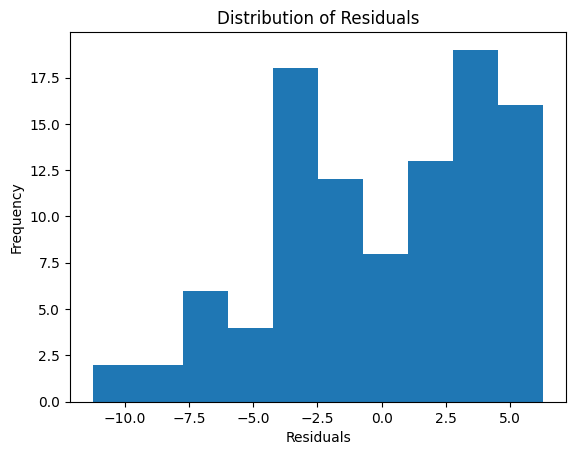

In [ ]:
residual = results.resid

plt.hist(residual)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

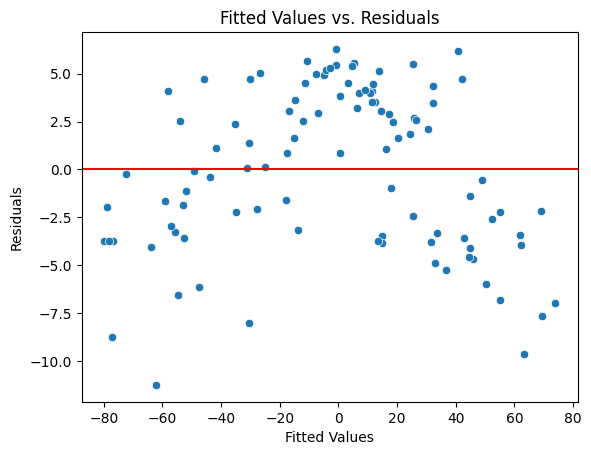

In [ ]:
sns.scatterplot(x=results.fittedvalues, y=residual)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')
plt.show()

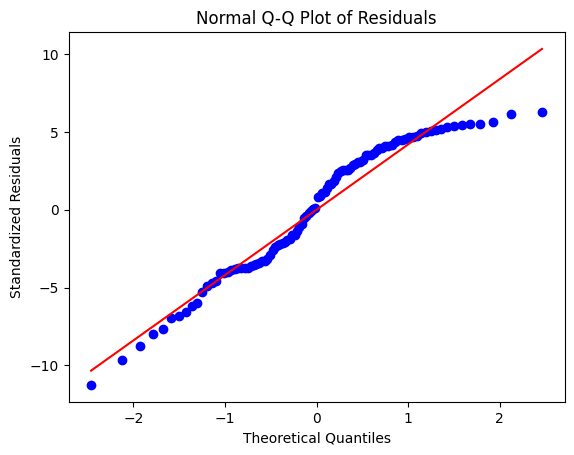

In [ ]:
qq_plot = stats.probplot(residual, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

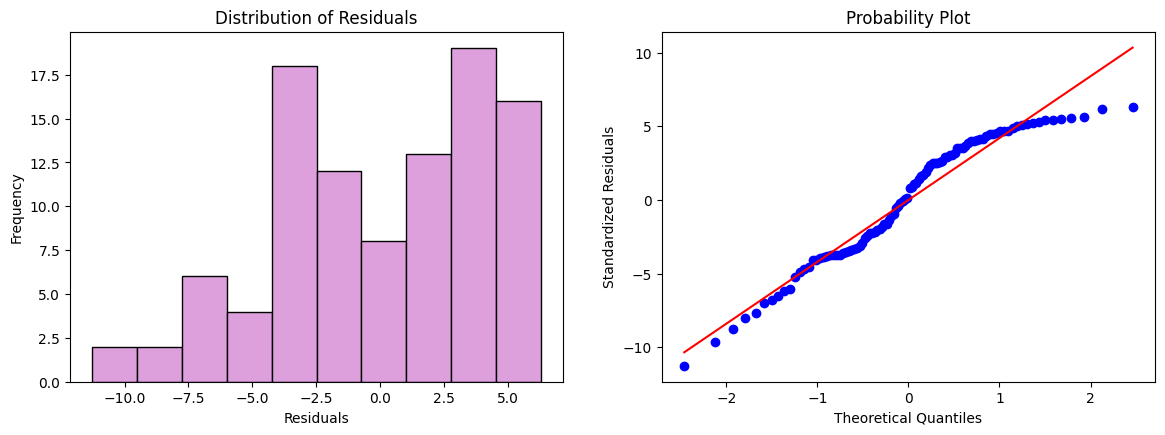

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout()

plt.subplot(2,2,1)
plt.hist(residual, color = 'plum', edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.subplot(2,2,2)
qq_plot = stats.probplot(residual, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

plt.show()


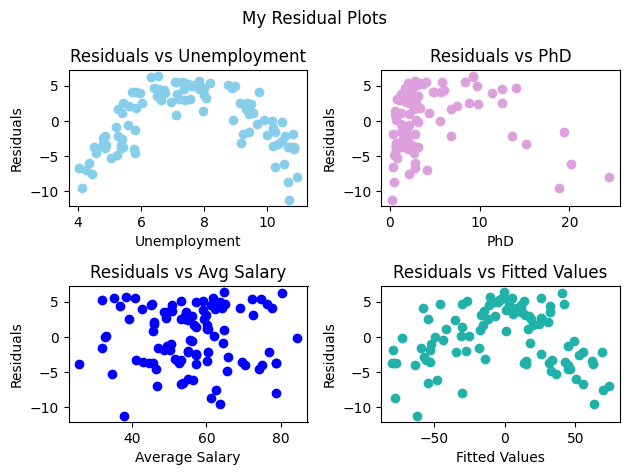

In [ ]:
fig, axes = plt.subplots(2,2)

# residuals vs unemployment
axes[0, 0].scatter(data['unemployment'], results.resid, color = 'skyblue')
axes[0, 0].set_xlabel('Unemployment')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Unemployment')

# residuals vs phd
axes[0, 1].scatter(data['phd'], results.resid, color = 'plum')
axes[0, 1].set_xlabel('PhD')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs PhD')

# residuals vs avg_salary
axes[1, 0].scatter(data['avg_salary'], results.resid, color = 'blue')
axes[1, 0].set_xlabel('Average Salary')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals vs Avg Salary')

# residuals vs fitted values
axes[1, 1].scatter(results.fittedvalues, results.resid, color = 'lightseagreen')
axes[1, 1].set_xlabel('Fitted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Fitted Values')

# overall formatting
fig.suptitle("My Residual Plots", fontsize=12)
plt.tight_layout()
plt.show()

# Unemployment

Now consider a non-linear term for the variable unemployment. Add a quadratic term to your model.
Report your results and relevant plots. How good a fit for the data is it? Does it improve the model
over the model without the quadratic term? Explain. If it does, keep it in the model going forward.

In [ ]:
model2 = smf.ols(formula='dem_vote_margin ~ unemployment + np.square(unemployment) + phd + county_type + avg_salary', data=data)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dem_vote_margin   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6499.
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          1.16e-119
Time:                        19:43:40   Log-Likelihood:                -209.30
No. Observations:                 100   AIC:                             432.6
Df Residuals:                      93   BIC:                             450.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  48.4417      3.479     13.926      0.000      41.534      55.350
county_type[T.suburban]    15.4354      0.523     29.503      0.000      14.396      16.474
county_type[T.urban]       36.1080      0.529     68.293      0.000      35.058      37.158
unemployment               -1.0237      0.899     -1.139      0.258      -2.809       0.761
np.square(unemployment)    -1.0751      0.059    -18.366      0.000      -1.191      -0.959
phd                         0.7347      0.044     16.832      0.000       0.648       0.821
avg_salary                  0.0317      0.018      1.784      0.078      -0.004       0.067
==============================================================================
Omnibus:                       10.705   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.801
Skew:                          -0.841   Prob(JB):                      0.00274
Kurtosis:                       2.939   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

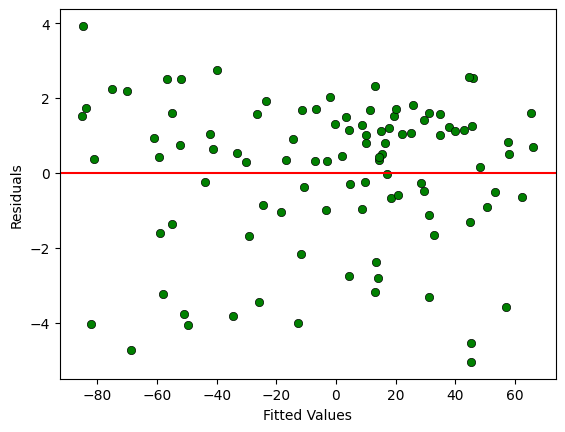

In [ ]:
sns.scatterplot(x=results2.fittedvalues, y=results2.resid, color = 'green', edgecolor = 'black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

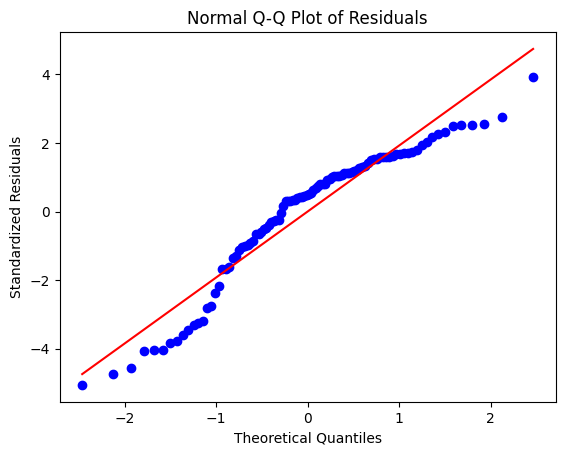

In [ ]:
qq_plot = stats.probplot(results2.resid, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

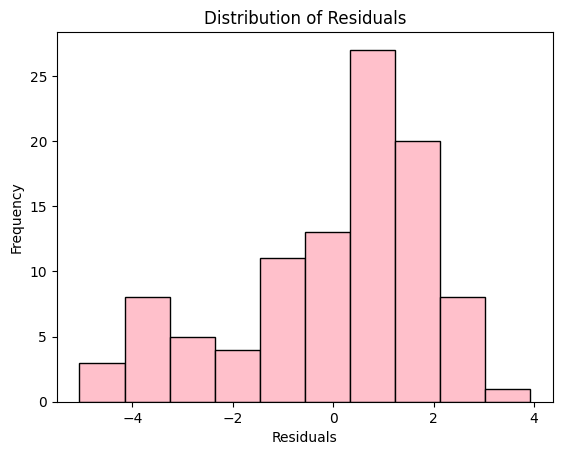

In [ ]:
plt.hist(results2.resid, color = 'pink', edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

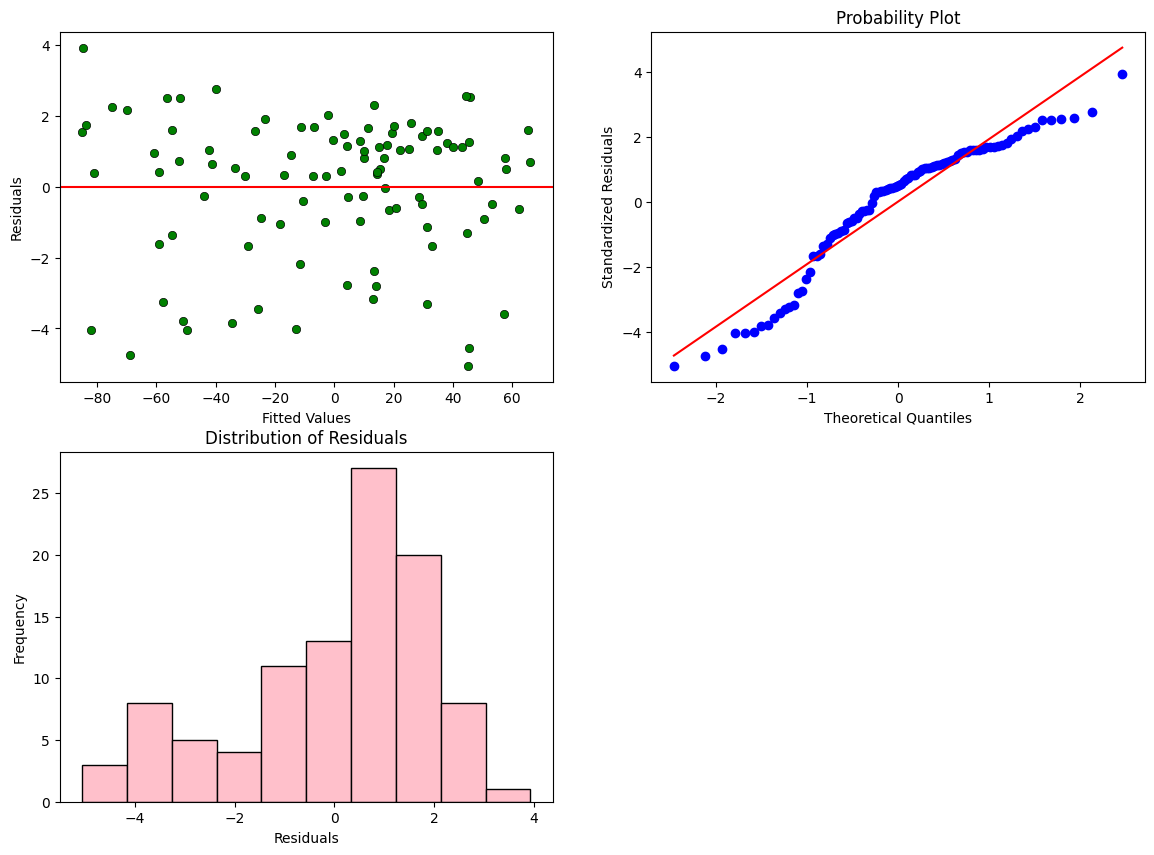

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout()

plt.subplot(2,2,1)
sns.scatterplot(x=results2.fittedvalues, y=results2.resid, color = 'green', edgecolor = 'black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(2,2,2)
qq_plot = stats.probplot(results2.resid, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

plt.subplot(2,2,3)
plt.hist(results2.resid, color = 'pink', edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# phd

Now consider a log transformation on the variable phd and add that to the model. Report your results
and relevant plots. How good a fit for the data is it? Does it improve the model over the model before
the transformation? Explain. If it does, keep it in the model going forward.

In [ ]:
model3 = smf.ols(formula='dem_vote_margin ~ unemployment + np.square(unemployment) + np.log(phd) + county_type + avg_salary', data=data)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dem_vote_margin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.412e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          2.01e-162
Time:                        19:43:42   Log-Likelihood:                -103.42
No. Observations:                 100   AIC:                             220.8
Df Residuals:                      93   BIC:                             239.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  50.6076      1.194     42.371      0.000      48.236      52.979
county_type[T.suburban]    15.4736      0.181     85.270      0.000      15.113      15.834
county_type[T.urban]       35.7428      0.184    194.524      0.000      35.378      36.108
unemployment               -1.9330      0.309     -6.264      0.000      -2.546      -1.320
np.square(unemployment)    -1.0029      0.020    -49.957      0.000      -1.043      -0.963
np.log(phd)                 4.0261      0.073     55.087      0.000       3.881       4.171
avg_salary                  0.0260      0.006      4.212      0.000       0.014       0.038
==============================================================================
Omnibus:                        6.255   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.233
Skew:                           0.417   Prob(JB):                       0.0443
Kurtosis:                       3.894   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

oky why log of pdh even helped out with the pva;ue of avr_salary? inversitigate please

Text(0, 0.5, 'Residuals')

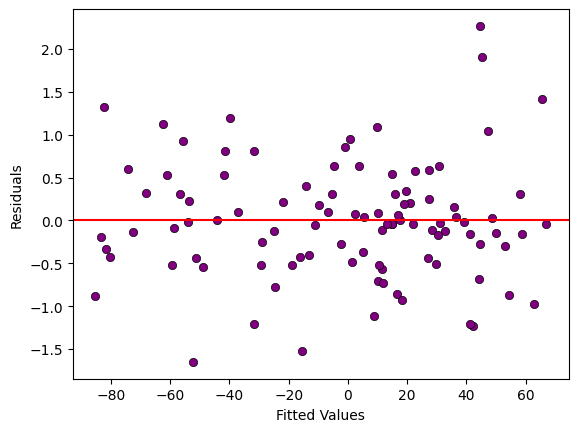

In [ ]:
sns.scatterplot(x=results3.fittedvalues, y=results3.resid, color = 'purple', edgecolor = 'black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

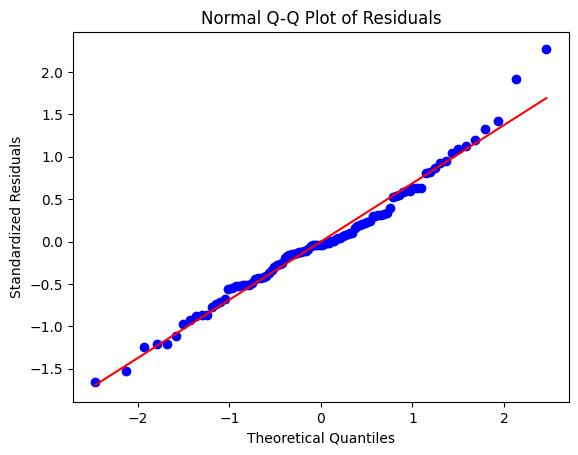

In [ ]:
qq_plot = stats.probplot(results3.resid, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

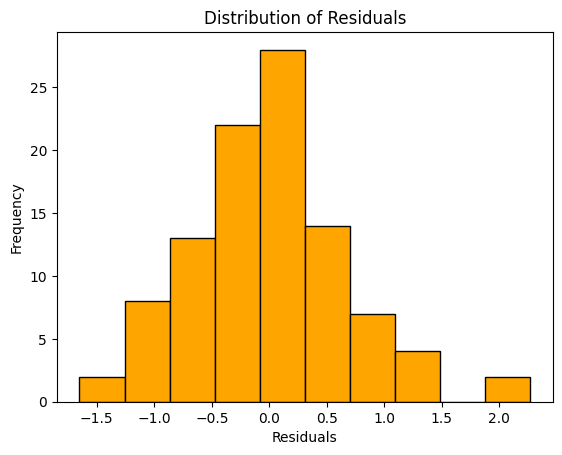

In [ ]:
plt.hist(results3.resid, color = 'orange', edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

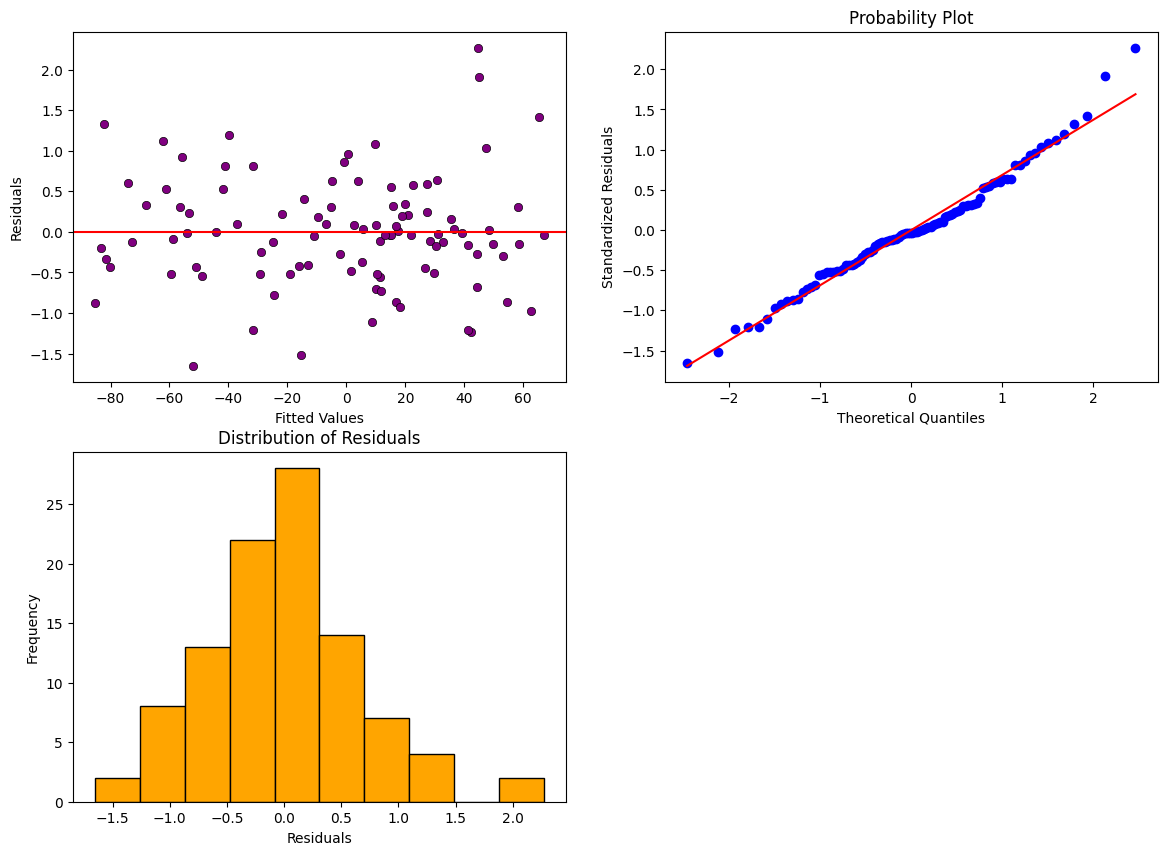

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout

plt.subplot(2, 2, 1)
sns.scatterplot(x=results3.fittedvalues, y=results3.resid, color = 'purple', edgecolor = 'black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(2, 2, 2)
qq_plot = stats.probplot(results3.resid, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')

plt.subplot(2, 2, 3)
plt.hist(results3.resid, color = 'orange', edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Interaction Terms

Include interaction terms in the model. Report your results and relevant plots. How good a fit for the
data is it? Does it improve the model over the model without interactions? Explain. Keep the significant
interaction terms in the model going forward.

In [ ]:
model4 = smf.ols(formula='dem_vote_margin ~ unemployment + np.square(unemployment) + np.log(phd) + county_type*avg_salary', data=data)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dem_vote_margin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.983e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          9.56e-158
Time:                        19:43:43   Log-Likelihood:                -103.28
No. Observations:                 100   AIC:                             224.6
Df Residuals:                      91   BIC:                             248.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             50.7364      1.244     40.797      0.000      48.266      53.207
county_type[T.suburban]               15.3025      0.859     17.809      0.000      13.596      17.009
county_type[T.urban]                  35.2900      0.924     38.189      0.000      33.454      37.126
unemployment                          -1.9154      0.316     -6.057      0.000      -2.544      -1.287
np.square(unemployment)               -1.0038      0.021    -48.917      0.000      -1.045      -0.963
np.log(phd)                            4.0271      0.074     54.485      0.000       3.880       4.174
avg_salary                             0.0225      0.011      2.116      0.037       0.001       0.044
county_type[T.suburban]:avg_salary     0.0028      0.015      0.182      0.856      -0.027       0.033
county_type[T.urban]:avg_salary        0.0077      0.015      0.501      0.617      -0.023       0.038
==============================================================================
Omnibus:                        5.733   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.769
Skew:                           0.372   Prob(JB):                       0.0559
Kurtosis:                       3.911   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model5 = smf.ols(formula='dem_vote_margin ~ unemployment + np.square(unemployment) + county_type*np.log(phd) + avg_salary', data=data)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dem_vote_margin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.464e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          7.65e-175
Time:                        19:43:44   Log-Likelihood:                -60.020
No. Observations:                 100   AIC:                             138.0
Df Residuals:                      91   BIC:                             161.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              50.0818      0.787     63.644      0.000      48.519      51.645
county_type[T.suburban]                15.9627      0.152    104.810      0.000      15.660      16.265
county_type[T.urban]                   34.8788      0.176    198.584      0.000      34.530      35.228
unemployment                           -1.7489      0.203     -8.624      0.000      -2.152      -1.346
np.square(unemployment)                -1.0174      0.013    -77.000      0.000      -1.044      -0.991
np.log(phd)                             4.0772      0.083     48.926      0.000       3.912       4.243
county_type[T.suburban]:np.log(phd)    -0.5825      0.110     -5.287      0.000      -0.801      -0.364
county_type[T.urban]:np.log(phd)        0.7774      0.127      6.113      0.000       0.525       1.030
avg_salary                              0.0258      0.004      6.380      0.000       0.018       0.034
==============================================================================
Omnibus:                        9.386   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.555
Skew:                           0.615   Prob(JB):                      0.00842
Kurtosis:                       3.882   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

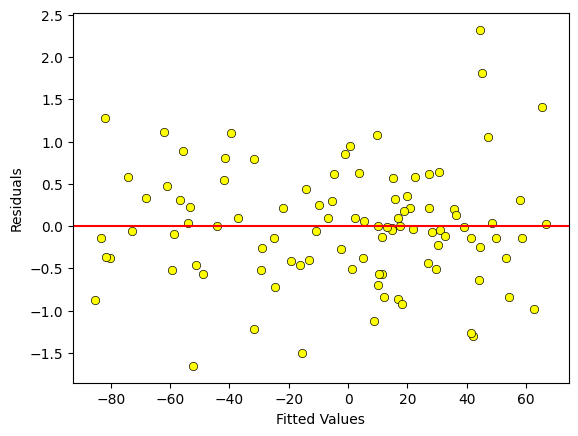

In [ ]:
sns.scatterplot(x=results4.fittedvalues, y=results4.resid, color = 'yellow', edgecolor = 'black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

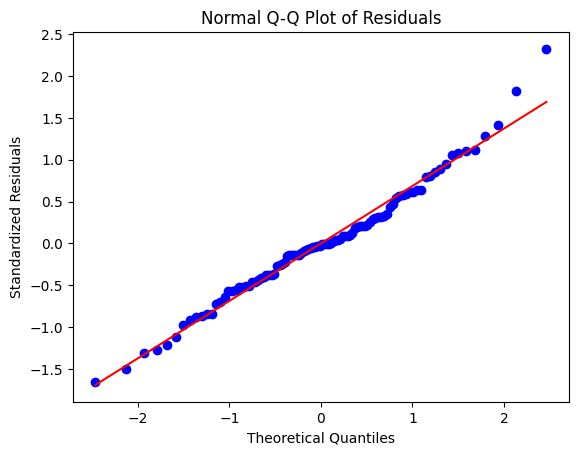

In [ ]:
qq_plot = stats.probplot(results4.resid, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

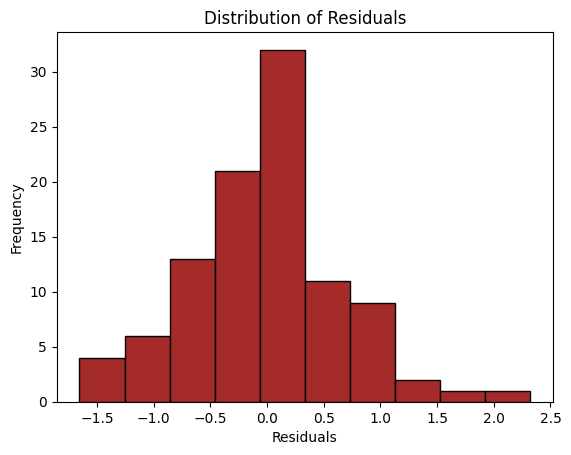

In [ ]:
plt.hist(results4.resid, color = 'brown', edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

Text(0.5, 1.0, 'Distribution of Residuals')

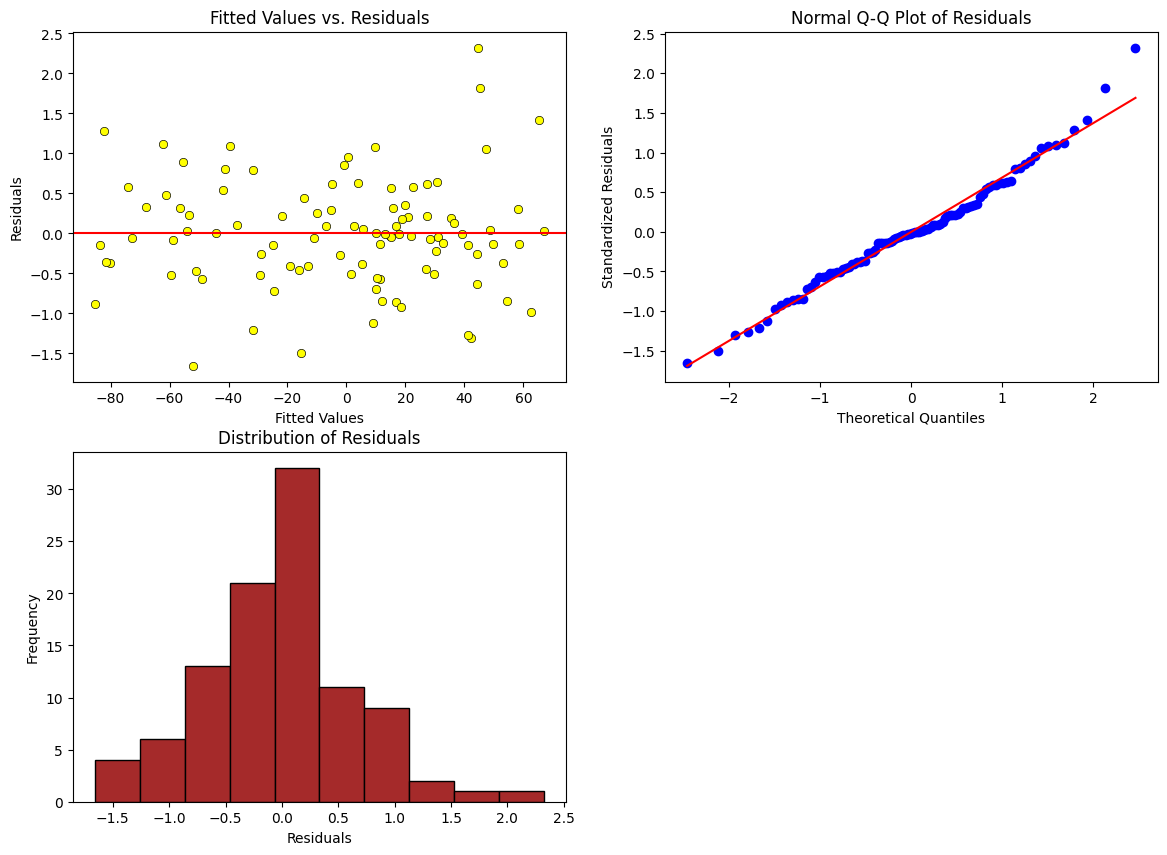

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout

plt.subplot(2,2,1)
sns.scatterplot(x=results4.fittedvalues, y=results4.resid, color = 'yellow', edgecolor = 'black')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')

plt.subplot(2,2,2)
qq_plot = stats.probplot(results4.resid, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Normal Q-Q Plot of Residuals')

plt.subplot(2,2,3)
plt.hist(results4.resid, color = 'brown', edgecolor = 'black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

In [ ]:
model6 = smf.ols(formula='dem_vote_margin ~ unemployment + np.square(unemployment)*avg_salary + np.log(phd) + county_type', data=data)
results6 = model6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dem_vote_margin   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.590e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          4.87e-160
Time:                        19:43:44   Log-Likelihood:                -103.42
No. Observations:                 100   AIC:                             222.8
Df Residuals:                      92   BIC:                             243.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             50.5759      1.293     39.120      0.000      48.008      53.144
county_type[T.suburban]               15.4728      0.183     84.635      0.000      15.110      15.836
county_type[T.urban]                  35.7410      0.187    191.287      0.000      35.370      36.112
unemployment                          -1.9364      0.315     -6.155      0.000      -2.561      -1.312
np.square(unemployment)               -1.0020      0.025    -40.895      0.000      -1.051      -0.953
avg_salary                             0.0267      0.013      1.996      0.049       0.000       0.053
np.square(unemployment):avg_salary -1.209e-05      0.000     -0.066      0.947      -0.000       0.000
np.log(phd)                            4.0265      0.074     54.544      0.000       3.880       4.173
==============================================================================
Omnibus:                        6.220   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.213
Skew:                           0.413   Prob(JB):                       0.0447
Kurtosis:                       3.899   Cond. No.                     7.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""